#***#Task1*-Prediction using Supervised ML**

**Intern name- Rahul Rajeev Mudatholy**

**1.Problem statement**-Predicting percentage of student by the number of hours of studying.So,what will be predicted score if a student studies for 9.25 hrs/ day?

**2.Data**-'https://bit.ly/w-data'

**3.Features**-attribute-"Hours",label-"Scores"

**4.Evaluation-** Mean-absolute-error


##**Reading the data**

In [1]:
#importing required libraries
import pandas as pd
import numpy as np  
import matplotlib.pyplot as plt  
%matplotlib inline

In [2]:
# Reading data from the link
url = "http://bit.ly/w-data"
Students = pd.read_csv(url)
print("Data imported successfully")

Students.head()

Data imported successfully


,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30


In [3]:
#Checking the len of data
len(Students)

25

In [4]:
Students.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25 entries, 0 to 24
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Hours   25 non-null     float64
 1   Scores  25 non-null     int64  
dtypes: float64(1), int64(1)
memory usage: 528.0 bytes


In [5]:
Students.describe()

,Hours,Scores
count,25.000000,25.000000
mean,5.012000,51.480000
std,2.525094,25.286887
min,1.100000,17.000000
25%,2.700000,30.000000
50%,4.800000,47.000000
75%,7.400000,75.000000
max,9.200000,95.000000


In [6]:
#checking any missing values
Students.isnull().sum()

Hours     0
Scores    0
dtype: int64

## **Visualization**

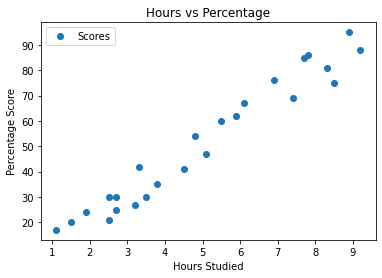

In [7]:
#ploting the data
Students.plot(x='Hours', y='Scores', style='o')  
plt.title('Hours vs Percentage')  
plt.xlabel('Hours Studied')  
plt.ylabel('Percentage Score')  
plt.show()

(array([4., 5., 1., 3., 1., 2., 2., 2., 3., 2.]),
 array([17. , 24.8, 32.6, 40.4, 48.2, 56. , 63.8, 71.6, 79.4, 87.2, 95. ]),
 <a list of 10 Patch objects>)

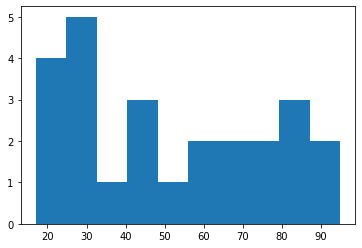

In [8]:
plt.hist(Students.Scores)#not normally distributed

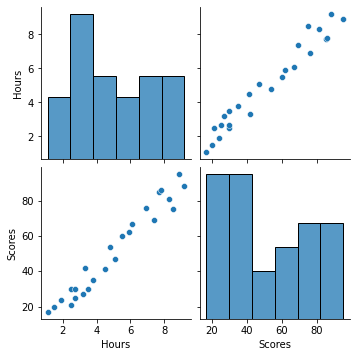

In [9]:
import seaborn as sns
sns.pairplot(Students)

In [10]:
#hecking the correlation
Students.corr() 

,Hours,Scores
Hours,1.000000,0.976191
Scores,0.976191,1.000000


**From Correlation matrix we can observe that Hours and Scores are positively correlated**

## **Splitting the data into train and test sets**

In [11]:
X=Students["Hours"]
X

0     2.5
1     5.1
2     3.2
3     8.5
4     3.5
5     1.5
6     9.2
7     5.5
8     8.3
9     2.7
10    7.7
11    5.9
12    4.5
13    3.3
14    1.1
15    8.9
16    2.5
17    1.9
18    6.1
19    7.4
20    2.7
21    4.8
22    3.8
23    6.9
24    7.8
Name: Hours, dtype: float64

In [12]:
y=Students["Scores"]
y

0     21
1     47
2     27
3     75
4     30
5     20
6     88
7     60
8     81
9     25
10    85
11    62
12    41
13    42
14    17
15    95
16    30
17    24
18    67
19    69
20    30
21    54
22    35
23    76
24    86
Name: Scores, dtype: int64

In [13]:
X=X.values.reshape(-1,1)
X.shape

(25, 1)

In [14]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=5)
len(X_train),len(X_test),len(y_train),len(y_test)

(20, 5, 20, 5)

## **Building Model**

In [16]:
#X-attribute(input),y-label(output)
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y,  test_size=0.2, random_state=0)

In [17]:
from sklearn.linear_model import LinearRegression  
reg = LinearRegression()  
reg.fit(X_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [18]:
#finding slope
m = reg.coef_ 
print('slope:',m)

slope: [9.91065648]


In [19]:
#finding intercept
c=reg.intercept_
print('intercept:',c)

intercept: 2.018160041434662


In [20]:
#y = m*x+c  i.e Regression line
line = m * X + c

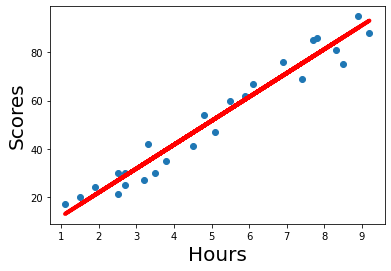

In [21]:
#ploting the model
plt.scatter(X,y)
plt.plot(X,line,lw=4,c='red')
plt.xlabel("Hours",fontsize=20)
plt.ylabel("Scores",fontsize=20)
plt.show()

#**Making Predictions**
Now that we have trained our model, it's time to make some predictions

In [22]:
print(X_test) # Testing data - In Hours
y_pred = reg.predict(X_test) # Predicting the scores

[[1.5]
 [3.2]
 [7.4]
 [2.5]
 [5.9]]


In [23]:
# Comparing Actual vs Predicted
df = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})  
df

,Actual,Predicted
5,20,16.884145
2,27,33.732261
19,69,75.357018
16,30,26.794801
11,62,60.491033


In [24]:
y_pred

array([16.88414476, 33.73226078, 75.357018  , 26.79480124, 60.49103328])

In [25]:

y_preds=reg.predict(X)
df1 = pd.DataFrame({'Actual': y, 'Predicted': y_preds})  
df1

,Actual,Predicted
0,21,26.794801
1,47,52.562508
2,27,33.732261
3,75,86.258740
4,30,36.705458
5,20,16.884145
6,88,93.196200
7,60,56.526771
8,81,84.276609
9,25,28.776933


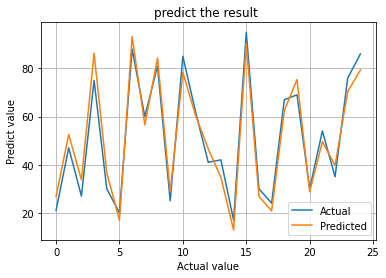

In [26]:
df1.plot()
plt.grid()
plt.xlabel('Actual value')
plt.ylabel("Predict value")
plt.title("predict the result ")
plt.show()

In [27]:
my_pred=pd.DataFrame(data=[9.25],columns=['Hours'])
my_pred

,Hours
0,9.25


In [28]:
#predicting my value
reg.predict(my_pred)

array([93.69173249])

**Here we get 'predicted score = 93.69' when 'hours of study =9.25 hours**

## **Evaluating the model**

In [29]:
#for simplicity here,we have chosen the mean square error
from sklearn import metrics
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test,y_pred))

Mean Absolute Error: 4.183859899002982
